In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [ ]:
microdata.to_pickle('../data/enem_2023.pkl') 

In [ ]:
dict_microdata.to_pickle('../data/dictionary/dict_microdata.pkl')

In [ ]:
items_data.to_pickle('../data/items_data.pkl')

In [12]:
microdata_filtered.to_pickle('../data/microdata_filtered.pkl')

In [ ]:
medias_gerais.to_pickle('../data/medias_gerais.pkl')

In [2]:
microdata = pd.read_pickle('../data/enem_2023.pkl')
items_data = pd.read_pickle('../data/items_data.pkl')
dict_microdata = pd.read_pickle('../data/dictionary/dict_microdata.pkl')
microdata_filtered = pd.read_pickle('../data/microdata_filtered.pkl')
medias_gerais = pd.read_pickle('../data/medias_gerais.pkl')

In [9]:
microdata_filtered.columns

Index(['Ano do ENEM', 'Estado civil', 'Raca/cor', 'Sexo', 'Nacionalidade',
       'Situação do Ensino Medio', 'Nota C Naturais', 'Nota C Humanas',
       'Nota Linguagens', 'Nota mat', 'Situacao redacao', 'Nota redacao',
       'NU_INSCRICAO'],
      dtype='object')

In [18]:
# Verificação de valores duplicados na coluna Ano do ENEM
microdata_filtered['Ano do ENEM'].duplicated().sum()

np.int64(999)

In [19]:
microdata_filtered['Ano do ENEM'].unique()

array([2023])

A coluna "Ano do ENEM" possui o mesmo valor: 2023. Portanto é ineficiente mantê-la no DataFrame

In [10]:
microdata_filtered = microdata_filtered.drop(columns=['Ano do ENEM'])

In [3]:
microdata_filtered.columns

Index(['Estado civil', 'Raca/cor', 'Sexo', 'Nacionalidade',
       'Situação do Ensino Medio', 'Nota C Naturais', 'Nota C Humanas',
       'Nota Linguagens', 'Nota mat', 'Situacao redacao', 'Nota redacao',
       'NU_INSCRICAO'],
      dtype='object')

**OUTLIERS**

Abaixo está a função para identificar os outliers nas notas de cada conhecimento

In [3]:
def outliers(coluna):
    q1 = microdata_filtered[coluna].quantile(0.25)
    q3 = microdata_filtered[coluna].quantile(0.75)

    iqr = q3 - q1

    lim_inferior = q1 - 1.5 * iqr
    lim_superior = q3 + 1.5 * iqr

    print(f"Coluna: {coluna}")
    print(f"Limite inferior: {lim_inferior:.2f}")
    print(f"Limite superior: {lim_superior:.2f}")
    print(f"Poucos alunos tiraram nota acima de {lim_superior:.2f} e abaixo de {lim_inferior:.2f}")

In [4]:
outliers('Nota C Naturais')

Coluna: Nota C Naturais
Limite inferior: 388.81
Limite superior: 604.31
Poucos alunos tiraram nota acima de 604.31 e abaixo de 388.81


In [5]:
outliers('Nota C Humanas')

Coluna: Nota C Humanas
Limite inferior: 445.76
Limite superior: 646.06
Poucos alunos tiraram nota acima de 646.06 e abaixo de 445.76


In [6]:
outliers('Nota Linguagens')

Coluna: Nota Linguagens
Limite inferior: 435.30
Limite superior: 631.70
Poucos alunos tiraram nota acima de 631.70 e abaixo de 435.30


In [7]:
outliers('Nota mat')

Coluna: Nota mat
Limite inferior: 348.81
Limite superior: 689.51
Poucos alunos tiraram nota acima de 689.51 e abaixo de 348.81


In [8]:
outliers('Nota redacao')

Coluna: Nota redacao
Limite inferior: 370.00
Limite superior: 930.00
Poucos alunos tiraram nota acima de 930.00 e abaixo de 370.00


In [13]:
# Média das 4 áreas por candidato (nota geral):
medias_gerais = pd.DataFrame({
    'NU_INSCRICAO': microdata_filtered['NU_INSCRICAO'],
    'media geral': microdata_filtered[[
    'Nota C Naturais', 'Nota C Humanas', 'Nota Linguagens', 'Nota mat', 'Nota redacao'
]].mean(axis=1)})

In [14]:
medias_gerais.head()

,NU_INSCRICAO,media geral
0,210059085136,545.82
1,210059527735,545.82
2,210061103945,507.94
3,210060214087,564.28
4,210059980948,425.38


In [17]:
# Média das notas por sexo
medias_gerais['sexo'] = microdata_filtered['Sexo'].copy()

In [18]:
medias_gerais.groupby('sexo')['media geral'].mean()

sexo
F    543.801804
M    553.809884
Name: media geral, dtype: float64

In [19]:
# Média das notas por sexo e área de conhecimento
microdata_filtered.groupby('Sexo')['Nota mat'].mean()

Sexo
F    510.735015
M    541.619653
Name: Nota mat, dtype: float64

In [20]:
microdata_filtered.groupby('Sexo')['Nota Linguagens'].mean()

Sexo
F    527.926606
M    532.552023
Name: Nota Linguagens, dtype: float64

In [21]:
microdata_filtered.groupby('Sexo')['Nota redacao'].mean()

Sexo
F    653.180428
M    634.161850
Name: Nota redacao, dtype: float64

In [22]:
# Área com maior dificuldade
media_por_area = pd.Series({
    'C Naturais': microdata_filtered['Nota C Naturais'].mean(axis=0),
    'C Humanas': microdata_filtered['Nota C Humanas'].mean(axis=0),
    'Linguagens': microdata_filtered['Nota Linguagens'].mean(axis=0),
    'Matematica': microdata_filtered['Nota mat'].mean(axis=0),
    'Redacao': microdata_filtered['Nota redacao'].mean(axis=0)
})

In [24]:
media_por_area = media_por_area.sort_values()
media_por_area

C Naturais    497.1654
Matematica    521.4211
Linguagens    529.5270
C Humanas     541.6095
Redacao       646.6000
dtype: float64

A área com maior nível de dificuldade foi Ciências Naturais.

In [5]:
# Desvio padrão das notas por tipo de escola


In [ ]:
# Distribuição da idade dos candidatos

In [7]:
microdata_filtered['Situação do Ensino Medio'].unique()

array([1, 2, 3, 4])

In [9]:
dict_microdata.head()

,DICIONÁRIO DE VARIÁVEIS - ENEM 2023,Descrição,Variáveis Categóricas,Categoria,Tamanho,Tipo
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NOME DA VARIÁVEL,Descrição,Variáveis Categóricas,NaN,Tamanho,Tipo
2,NaN,NaN,Categoria,Descrição,NaN,NaN
3,DADOS DO PARTICIPANTE,NaN,NaN,NaN,NaN,NaN
4,NU_INSCRICAO,Número de inscrição1,NaN,NaN,12,Numérica


In [14]:
filtro = dict_microdata['DICIONÁRIO DE VARIÁVEIS - ENEM 2023'].str.contains('TP_ESCOLA',case=False, na=False)

In [24]:
dict_microdata.loc[filtro, ['Descrição','Categoria','Variáveis Categóricas']]

,Descrição,Categoria,Variáveis Categóricas
67,Tipo de escola do Ensino Médio,Não Respondeu,1


In [26]:
dict_microdata.iloc[[67,68,69,70], [1,2,3]]

,Descrição,Variáveis Categóricas,Categoria
67,Tipo de escola do Ensino Médio,1,Não Respondeu
68,NaN,2,Pública
69,NaN,3,Privada
70,Tipo de instituição que concluiu ou concluirá ...,1,Ensino Regular


In [22]:
microdata_filtered = microdata_filtered.merge(microdata['TP_ESCOLA'], left_index=True, right_index=True)

In [23]:
microdata_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Estado civil              1000 non-null   int64  
 1   Raca/cor                  1000 non-null   int64  
 2   Sexo                      1000 non-null   object 
 3   Nacionalidade             1000 non-null   int64  
 4   Situação do Ensino Medio  1000 non-null   int64  
 5   Nota C Naturais           1000 non-null   float64
 6   Nota C Humanas            1000 non-null   float64
 7   Nota Linguagens           1000 non-null   float64
 8   Nota mat                  1000 non-null   float64
 9   Situacao redacao          1000 non-null   float64
 10  Nota redacao              1000 non-null   float64
 11  NU_INSCRICAO              1000 non-null   int64  
 12  TP_ESCOLA                 1000 non-null   int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 101.7+ KB


In [29]:
escola_publica = microdata_filtered.loc[microdata_filtered['TP_ESCOLA'] == 2]

In [31]:
escola_publica.head()

,Estado civil,Raca/cor,Sexo,Nacionalidade,Situação do Ensino Medio,Nota C Naturais,Nota C Humanas,Nota Linguagens,Nota mat,Situacao redacao,Nota redacao,NU_INSCRICAO,TP_ESCOLA
3,1,3,F,1,2,459.0,508.5,507.2,466.7,1.0,880.0,210060214087,2
4,1,3,F,1,2,402.5,379.2,446.9,338.3,1.0,560.0,210059980948,2
11,1,3,M,4,2,608.2,667.6,607.9,691.9,1.0,780.0,210060801595,2
12,1,3,M,1,2,498.7,546.1,532.1,512.2,1.0,640.0,210059527729,2
16,1,1,F,1,2,515.7,553.1,544.4,437.0,1.0,880.0,210058061534,2


In [32]:
escola_particular = microdata_filtered.loc[microdata_filtered['TP_ESCOLA'] == 3]

In [33]:
escola_particular.head()

,Estado civil,Raca/cor,Sexo,Nacionalidade,Situação do Ensino Medio,Nota C Naturais,Nota C Humanas,Nota Linguagens,Nota mat,Situacao redacao,Nota redacao,NU_INSCRICAO,TP_ESCOLA
122,1,3,F,1,2,440.8,603.5,597.7,663.3,1.0,700.0,210060440977,3
186,1,3,F,1,2,547.7,634.3,602.2,612.2,1.0,880.0,210058941510,3
474,1,5,F,1,2,487.8,535.4,519.4,591.0,1.0,740.0,210060801618,3
544,1,3,F,1,2,503.0,548.7,492.5,514.0,1.0,620.0,210061244814,3
652,1,2,F,1,2,364.8,484.1,415.0,491.5,1.0,740.0,210058387357,3


In [36]:
escola_publica.info() # 233 estudantes de escola pública na amostra de dados

<class 'pandas.core.frame.DataFrame'>
Index: 233 entries, 3 to 989
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Estado civil              233 non-null    int64  
 1   Raca/cor                  233 non-null    int64  
 2   Sexo                      233 non-null    object 
 3   Nacionalidade             233 non-null    int64  
 4   Situação do Ensino Medio  233 non-null    int64  
 5   Nota C Naturais           233 non-null    float64
 6   Nota C Humanas            233 non-null    float64
 7   Nota Linguagens           233 non-null    float64
 8   Nota mat                  233 non-null    float64
 9   Situacao redacao          233 non-null    float64
 10  Nota redacao              233 non-null    float64
 11  NU_INSCRICAO              233 non-null    int64  
 12  TP_ESCOLA                 233 non-null    int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 25.5+ KB


In [37]:
escola_particular.info() # Apenas 8 estudantes são de escola particular na amostra de dados

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 122 to 959
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Estado civil              8 non-null      int64  
 1   Raca/cor                  8 non-null      int64  
 2   Sexo                      8 non-null      object 
 3   Nacionalidade             8 non-null      int64  
 4   Situação do Ensino Medio  8 non-null      int64  
 5   Nota C Naturais           8 non-null      float64
 6   Nota C Humanas            8 non-null      float64
 7   Nota Linguagens           8 non-null      float64
 8   Nota mat                  8 non-null      float64
 9   Situacao redacao          8 non-null      float64
 10  Nota redacao              8 non-null      float64
 11  NU_INSCRICAO              8 non-null      int64  
 12  TP_ESCOLA                 8 non-null      int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 896.0+ bytes


A maior parte dos participantes na amostra não informaram o tipo de ensino (qual a causa disso?)

In [38]:
microdata_filtered['TP_ESCOLA'] = microdata_filtered['TP_ESCOLA'].map({
    1: 'Não informado',
    2: 'Escola Pública',
    3: 'Escola Privada'
})

In [39]:
microdata_filtered['TP_ESCOLA'].unique()

array(['Não informado', 'Escola Pública', 'Escola Privada'], dtype=object)

In [41]:
contagem = microdata_filtered['TP_ESCOLA'].value_counts()

Text(0.5, 1.0, 'Tipo do ensino dos estudantes')

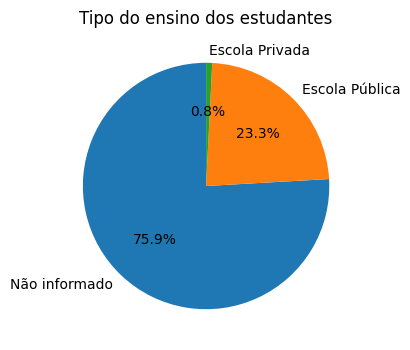

In [44]:
plt.figure(figsize=(4,4))
plt.pie(contagem, labels=contagem.index, autopct='%.1f%%', startangle=90) # labels - nomes das fatias
plt.title('Tipo do ensino dos estudantes')

Abaixo está um comparativo da média das notas de acordo com o tipo de ensino:

In [50]:
microdata_filtered.groupby('TP_ESCOLA')[['Nota C Naturais','Nota C Humanas','Nota mat', 'Nota Linguagens','Nota redacao']].mean()

,Nota C Naturais,Nota C Humanas,Nota mat,Nota Linguagens,Nota redacao
TP_ESCOLA,,,,,
Escola Privada,484.950000,566.262500,571.687500,533.112500,765.000000
Escola Pública,491.706009,537.054077,527.878112,530.305150,653.476395
Não informado,498.970092,542.748090,518.909091,529.250329,643.241107
